In [79]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

housing = pd.read_csv("USA_Housing.csv")
pd.options.display.float_format = "{:.2f}".format       # convert prices to decimal format (was eng. before)
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386


In [80]:
# Basic data statistics
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


<Axes: >

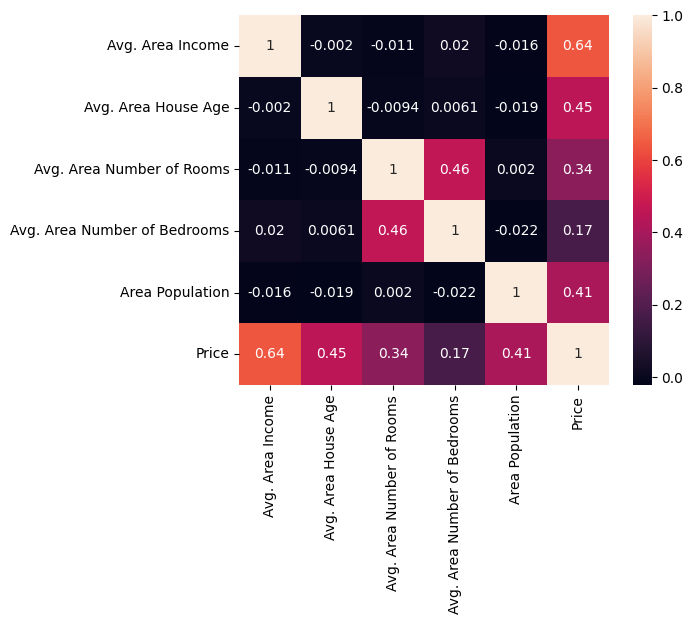

In [81]:
# Heat map from correlation matrix
corr_matrix = housing.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, square=True,)

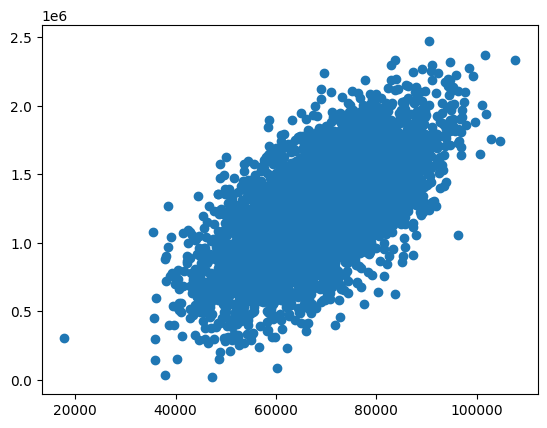

In [82]:
# We are interested in the price of the property
# Highest correlation seen with Avg. Area Income

plt.scatter(housing["Avg. Area Income"], housing.Price)

In [83]:
# model building
X = housing.iloc[:,0:-2]
y = housing.Price

In [84]:
# split the data.
# 80% training, 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [85]:
# Scale the data - standardise it
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)     # fitted
X_test = scaler.transform(X_test)           # just transformed, not fitted

In [86]:
# linear regression
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

y_pred = linearReg.predict(X_test)

In [87]:
vaginaballs = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
vaginaballs.head()

,Actual,Predicted
3279,1046957.12,1033215.80
1823,1308243.92,1364799.90
287,1592768.24,1599682.27
531,911202.17,935304.65
3480,983994.27,969735.64


In [88]:
# Model evaluation metrics
# Mean absolute error (MAE)      Mean square error (MSE)     Root mean square error (RMSE)     RSquared (R2)
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", metrics.r2_score(y_test, y_pred))

MAE: 84399.61054307087
MSE: 10741594522.882738
RMSE: 103641.66402988104
R2: 0.9193073159697813


In [89]:
diffMAE = 84399.61054307087 - 84399.61054307202
diffMSE = 10741594522.882738 - 10741594522.882992
diffRMSE = 103641.66402988104 - 103641.66402988226
diffR2 = 0.9193073159697813 - 0.9193073159697794

print(
    diffMAE,diffMSE,diffRMSE,diffR2
)

# it appears as if there is really no need to standardise the data. However, for another dataset this may be valuable ?!

-1.1496013030409813e-09 -0.0002536773681640625 -1.2223608791828156e-09 1.887379141862766e-15
